In [2]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Salary Ranges Dataset:

In [2]:
# load in the data set
salary_ranges = pd.read_csv('yunchewu/Feature-Engineering-Made-Easy/data/Salary_Ranges_by_Job_Classification.csv')

In [3]:
# view the first few rows and the headers
salary_ranges.head(2)

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D


In [4]:
# get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [5]:
# another method to check for missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [6]:
# show descriptive stats:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [7]:
# we will need to clean up some of our data:

In [8]:
# need to clean our Biweekly High and Low Rate columns to remove the dollar sign in order to visualize
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))
salary_ranges['Biweekly Low Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))

In [9]:
# Check to see the '$' has been removed
salary_ranges.head(2)

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,0.00,0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,15.00,15.00,323,0,D


In [10]:
# Convert the Biweeky columns to float
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
salary_ranges['Biweekly Low Rate'] = salary_ranges['Biweekly Low Rate'].astype(float)

In [11]:
# Convert Job Code to str
salary_ranges['Job Code'] = salary_ranges['Job Code'].astype(str)

In [12]:
# Convert Eff Date and Sal End Date to datetime
salary_ranges['Eff Date'] = pd.to_datetime(salary_ranges['Eff Date'])
salary_ranges['Sal End Date'] = pd.to_datetime(salary_ranges['Sal End Date'])

In [13]:
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [14]:
salary_ranges['Sal Plan'] = salary_ranges['Sal Plan'].astype(str)
salary_ranges['Pay Type'] = salary_ranges['Pay Type'].astype(str)

In [15]:
# check to see if converting the data types worked
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null datetime64[ns]
Sal End Date          1356 non-null datetime64[ns]
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null float64
Biweekly Low Rate     1356 non-null float64
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 137.8+ KB


In [16]:
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3161.727021,392.676991,0.150442
std,1.045816,1481.002904,1481.002904,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2145.000000,21.000000,0.000000
50%,1.000000,2856.500000,2856.500000,351.000000,0.000000
75%,1.000000,3703.000000,3703.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


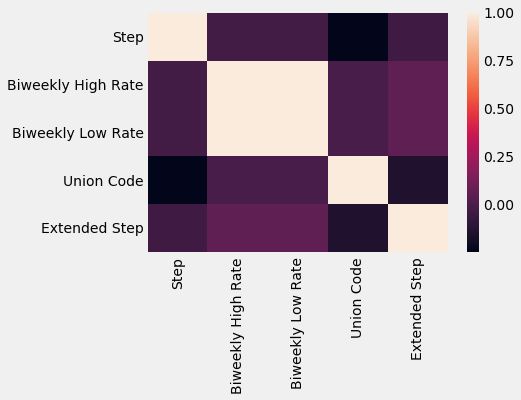

In [17]:
# show the correlation heatmap of the data to get a better sense of what we are looking at
sns.heatmap(salary_ranges.corr())
# no correlation across the data

In [18]:
# because there is little correlation, read the headers again and
# check the number of unique elements for each column of interest
# Note: The Biweekly High Rate and Low Rate appear to be the same

In [70]:
salary_ranges['Job Code'].nunique()

1268

In [71]:
salary_ranges['Eff Date'].nunique()

6

In [72]:
salary_ranges['Sal End Date'].nunique()

6

In [75]:
salary_ranges['Grade'].nunique()

688

In [76]:
salary_ranges['Pay Type'].nunique()

6

In [19]:
salary_ranges['Sal Plan'].nunique()

1

In [ ]:
# Which Grade has the maximum Biweekly high rate
# What is the average rate across all of the Grades

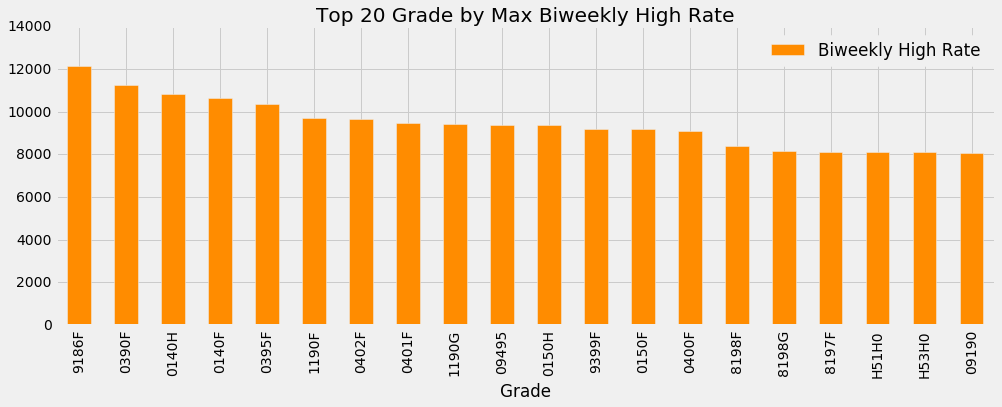

In [72]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Max Biweekly High Rate')

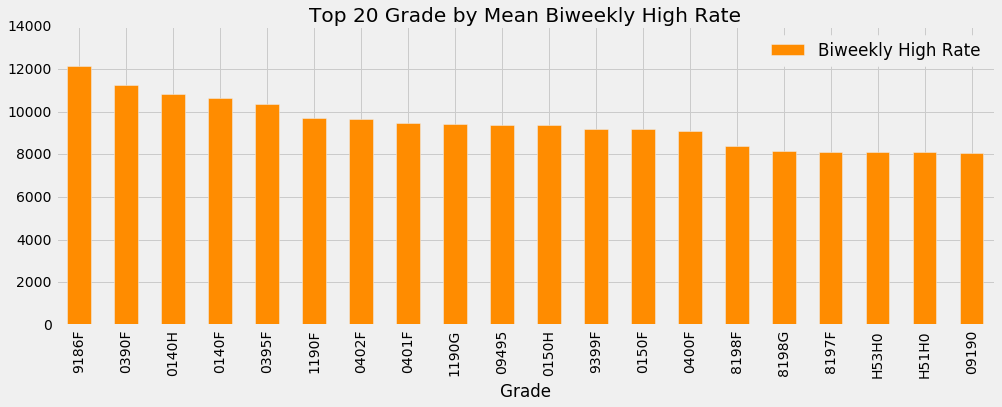

In [52]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

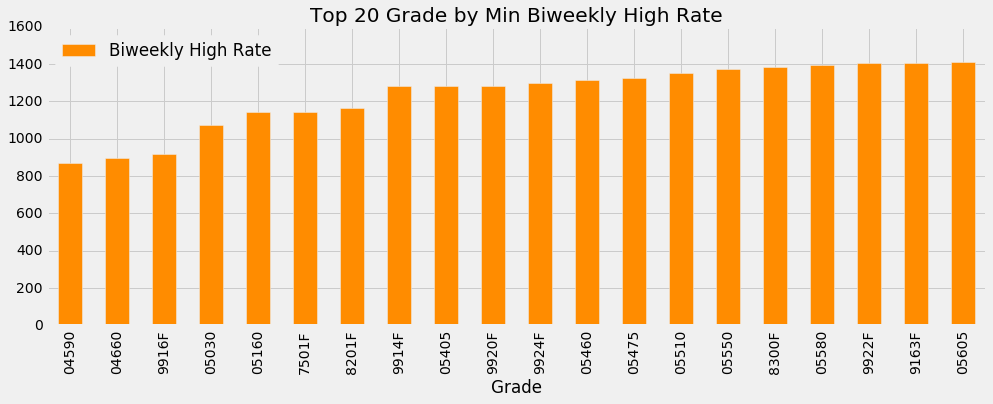

In [73]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=True).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Min Biweekly High Rate')

# Further plotting: 

Only using Biweekly High rate since they are the same as Low rate

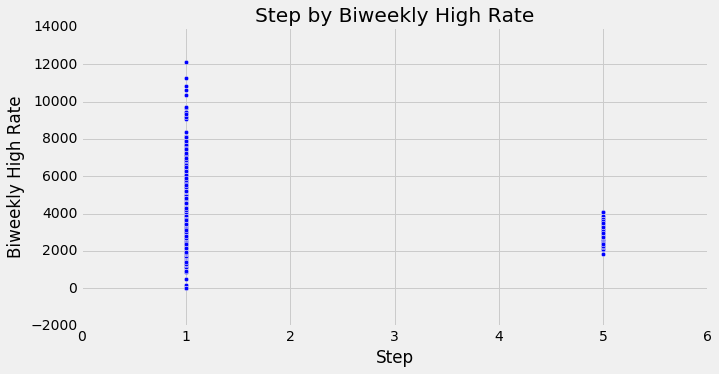

In [70]:
x = salary_ranges['Step']
y = salary_ranges['Biweekly High Rate']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('Step')
ax.set_ylabel('Biweekly High Rate')
ax.set_title('Step by Biweekly High Rate')
plt.show()

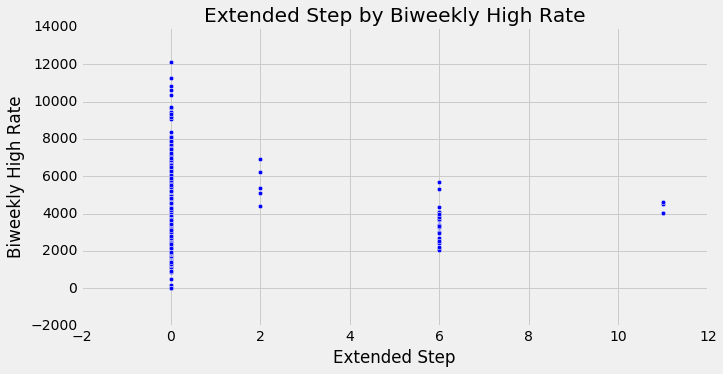

In [71]:
x = salary_ranges['Extended Step']
y = salary_ranges['Biweekly High Rate']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('Extended Step')
ax.set_ylabel('Biweekly High Rate')
ax.set_title('Extended Step by Biweekly High Rate')
plt.show()

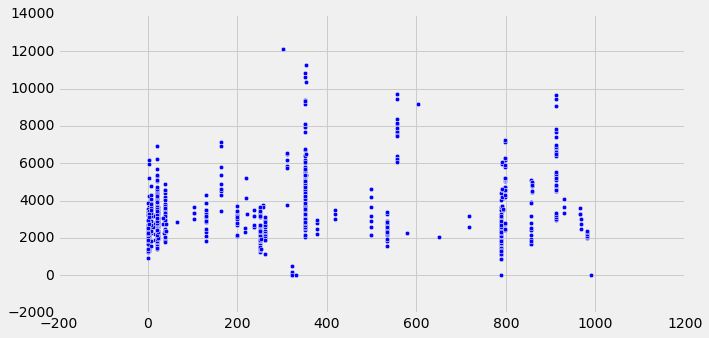

In [116]:
x = salary_ranges['Union Code']
y = salary_ranges['Biweekly High Rate']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

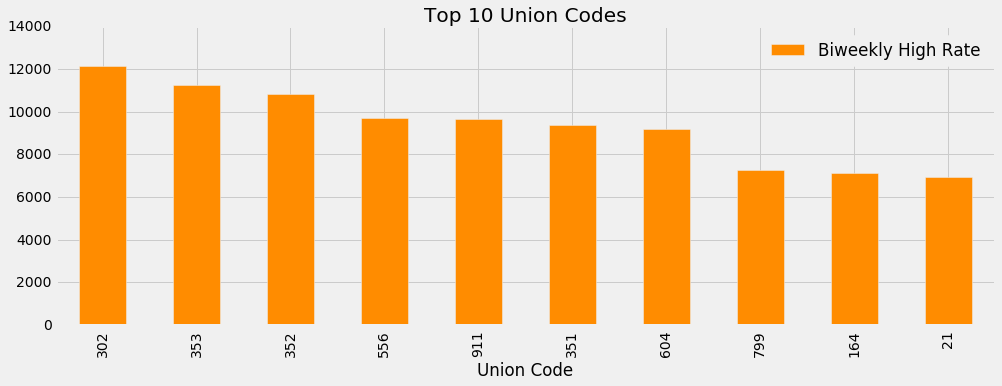

In [59]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Union Code')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 10 Union Codes')

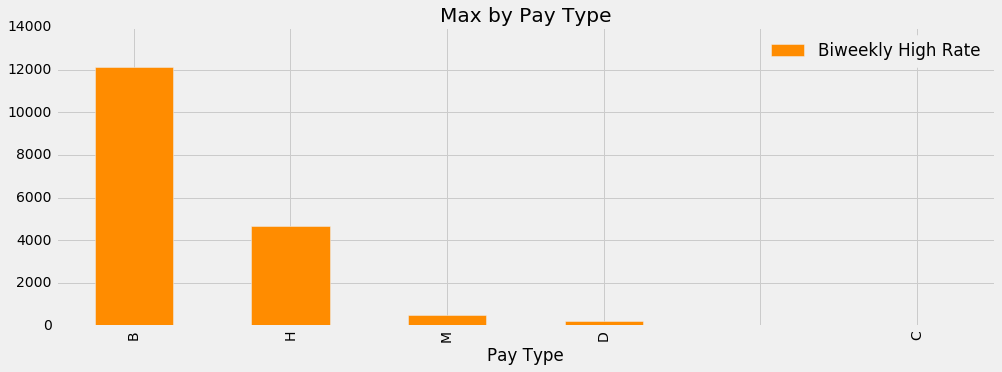

In [63]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Pay Type')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max by Pay Type')

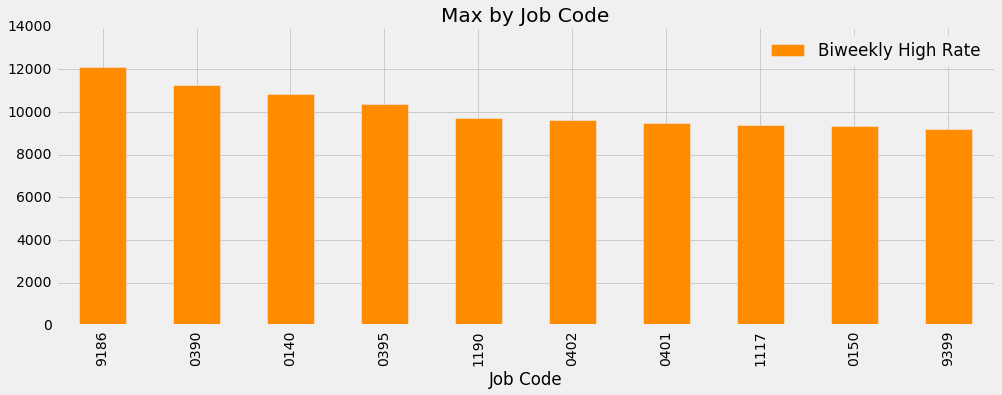

In [64]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Job Code')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max by Job Code')

# SFO Customer Survey Dataset:

In [131]:
# load in the data set
customer = pd.read_csv('/Users/divyasusarla/Desktop/Feature_Engineering/Ch_2_Feature_Understanding/Data/2013_SFO_Customer_survey.csv')

In [132]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [133]:
customer.isnull().sum()

RESPNUM               0
CCGID                 0
RUN                   0
INTDATE               0
GATE                  0
STRATA                0
PEAK                  0
METHOD                0
AIRLINE               0
FLIGHT                0
DEST                  0
DESTGEO               0
DESTMARK              0
ARRTIME               0
DEPTIME               0
Q2PURP1               0
Q2PURP2              76
Q2PURP3            3372
Q2PURP4            3518
Q2PURP5            3533
Q2PURP6            3535
Q3GETTO1              0
Q3GETTO2             30
Q3GETTO3           3518
Q3GETTO4           3534
Q3GETTO5           3535
Q3GETTO6           3535
Q3PARK             3251
Q4BAGS                0
Q4BUY                 0
                   ... 
Q10COM3            3521
Q11A_USEWEB           0
Q11B_USESFOAPP        0
Q11C_USEOTHAPP        0
Q11D_USESOCMED        0
Q11E_USEWIFI          0
Q12COM1            2829
Q12COM2            3460
Q12COM3            3533
Q13_WHEREDEPART       0
Q13_RATEGETTO   

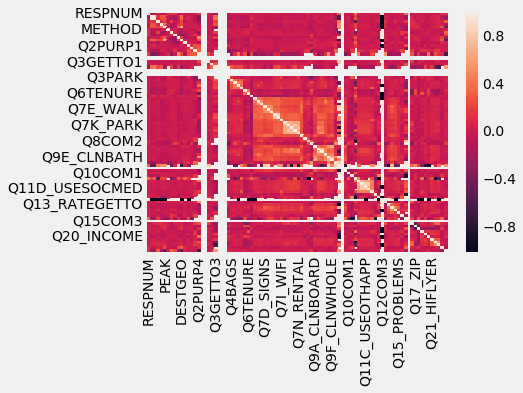

In [125]:
sns.heatmap(customer.corr())

In [135]:
# we see that there are quite a few null values, so let's discuss methods for handling missing data
# other methods to handle missing data, (called imputing): 
# using the mean of the column for the missing values,
# utilizing machine learning methods to fill in the data

In [126]:
# here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [127]:
customer.isnull().sum()

RESPNUM            0
CCGID              0
RUN                0
INTDATE            0
GATE               0
STRATA             0
PEAK               0
METHOD             0
AIRLINE            0
FLIGHT             0
DEST               0
DESTGEO            0
DESTMARK           0
ARRTIME            0
DEPTIME            0
Q2PURP1            0
Q3GETTO1           0
Q4BAGS             0
Q4BUY              0
Q4FOOD             0
Q4WIFI             0
Q5FLYPERYR         0
Q6TENURE           0
SAQ                0
Q7A_ART            0
Q7B_FOOD           0
Q7C_SHOPS          0
Q7D_SIGNS          0
Q7E_WALK           0
Q7F_SCREENS        0
                  ..
Q7M_LTPARK         0
Q7N_RENTAL         0
Q7O_WHOLE          0
Q9A_CLNBOARD       0
Q9B_CLNAIRTRAIN    0
Q9C_CLNRENT        0
Q9D_CLNFOOD        0
Q9E_CLNBATH        0
Q9F_CLNWHOLE       0
Q10SAFE            0
Q11A_USEWEB        0
Q11B_USESFOAPP     0
Q11C_USEOTHAPP     0
Q11D_USESOCMED     0
Q11E_USEWIFI       0
Q13_WHEREDEPART    0
Q13_RATEGETTO

In [128]:
# Columns with null values got dropped (went from 95 columns to 66)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q3GETTO1           3535 non-null int64
Q4BAGS             3535 non-null int64
Q4BUY              3535 non-null int64
Q4FOOD             3535 non-null int64
Q4WIFI             3535 non-null int64
Q5FLYPERYR         3535 non-null int64
Q6TENURE           3535 non-null

In [129]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,3535.0,2119.889392,1385.474407,1.000000,886.500000,2137.000000,3168.500000,9995.000000
RUN,3535.0,1960.375389,458.893056,1201.000000,1605.500000,1918.000000,2403.000000,2806.000000
INTDATE,3535.0,9.431966,4.561762,2.000000,6.000000,9.000000,14.000000,18.000000
GATE,3535.0,52.635078,34.075357,1.000000,21.000000,52.000000,87.000000,102.000000
STRATA,3535.0,1.977652,0.778393,1.000000,1.000000,2.000000,3.000000,3.000000
PEAK,3535.0,2.117115,0.767092,1.000000,2.000000,2.000000,3.000000,3.000000
METHOD,3535.0,1.011315,0.115993,1.000000,1.000000,1.000000,1.000000,3.000000
AIRLINE,3535.0,23.683734,11.515232,2.000000,14.000000,29.000000,33.000000,38.000000
FLIGHT,3535.0,1187.998868,1407.551713,1.000000,387.000000,758.000000,1404.000000,6455.000000
DEST,3535.0,57.254597,30.339705,2.000000,32.000000,55.000000,88.000000,106.000000


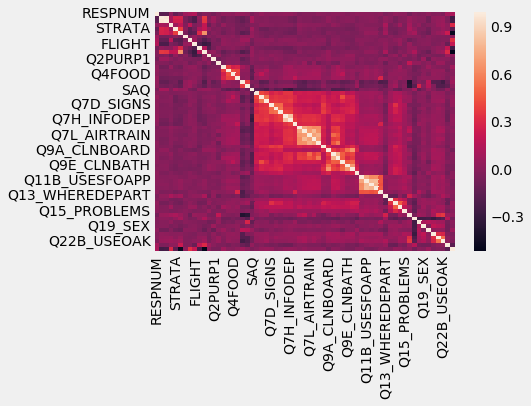

In [130]:
sns.heatmap(customer.corr())

# Chicago Food Inspections Data

In [43]:
# load in the data set
food = pd.read_csv('/Users/divyasusarla/Downloads/Food_Inspections.csv')

In [44]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154657 entries, 0 to 154656
Data columns (total 17 columns):
Inspection ID      154657 non-null int64
DBA Name           154657 non-null object
AKA Name           152113 non-null object
License #          154642 non-null float64
Facility Type      150086 non-null object
Risk               154589 non-null object
Address            154657 non-null object
City               154497 non-null object
State              154648 non-null object
Zip                154559 non-null float64
Inspection Date    154657 non-null object
Inspection Type    154656 non-null object
Results            154657 non-null object
Violations         123679 non-null object
Latitude           154110 non-null float64
Longitude          154110 non-null float64
Location           154110 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 20.1+ MB


In [45]:
food.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2544
License #             15
Facility Type       4571
Risk                  68
Address                0
City                 160
State                  9
Zip                   98
Inspection Date        0
Inspection Type        1
Results                0
Violations         30978
Latitude             547
Longitude            547
Location             547
dtype: int64

In [46]:
food.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2081933,KOME,KOME,2542243.0,Restaurant,Risk 1 (High),1303 S MICHIGAN AVE,CHICAGO,IL,60605.0,09/12/2017,License,Pass,37. TOILET ROOM DOORS SELF CLOSING: DRESSING R...,41.865649,-87.623965,"(41.865648779880125, -87.62396517625166)"
1,1955876,A&T PANCAKE HOUSE,A&T PANCAKE HOUSE,2293343.0,Restaurant,Risk 1 (High),7036 N CLARK ST,CHICAGO,IL,60626.0,09/12/2017,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,42.010124,-87.674370,"(42.01012437485032, -87.67436989898064)"


In [47]:
food['Results'].unique()

array(['Pass', 'Fail', 'Not Ready', 'No Entry', 'Out of Business',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

In [48]:
food['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', nan, 'All'], dtype=object)

This dataset is a good example of descriptive data:
Understanding the type of data that we are working with will give us a better idea of what type of ML model to impelement.

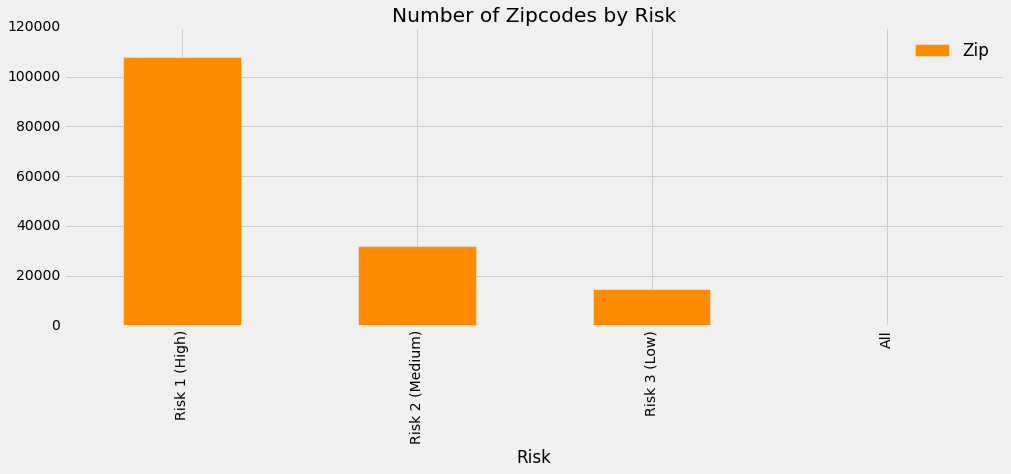

In [54]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Risk')[['Zip']].count().sort_values(
    'Zip', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Number of Zipcodes by Risk')

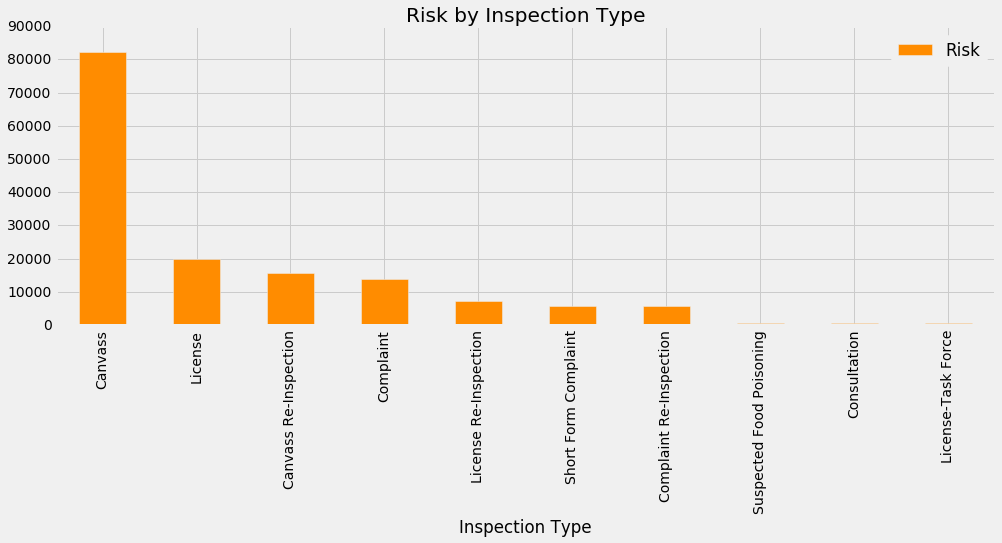

In [66]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].count().sort_values(
    'Risk', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Risk by Inspection Type')

In [67]:
# Clean risk to numeric values

In [68]:
food['Risk'] = food['Risk'].astype(str)

In [75]:
food['Risk'] = food['Risk'].map(lambda value: value.replace('Risk', '').replace('(High)', '').replace('(Low)', '').replace('(Medium)', '').replace('All', '0').replace('nan', '0'))

In [77]:
food['Risk'] = food['Risk'].astype(int)

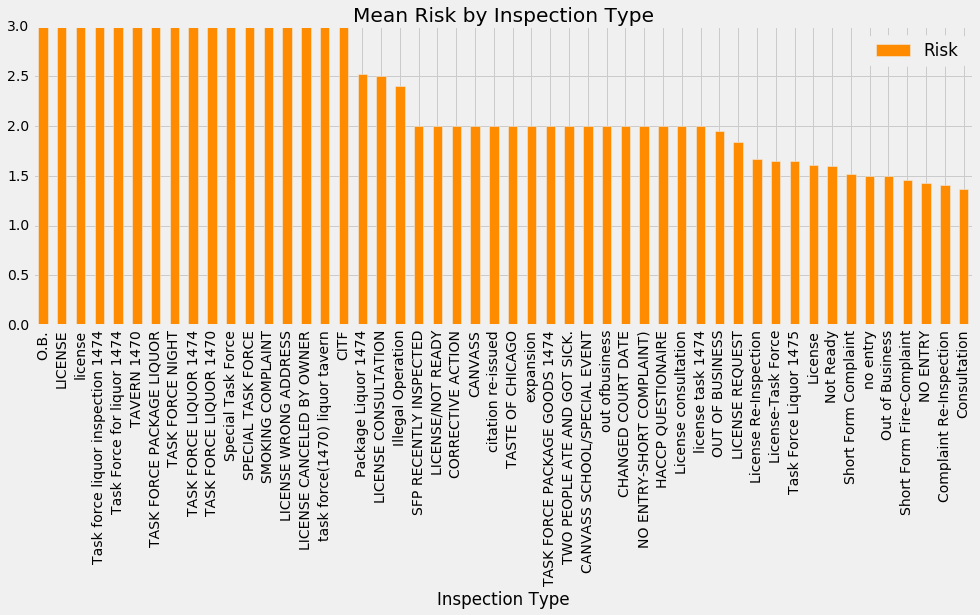

In [84]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].mean().sort_values(
    'Risk', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Mean Risk by Inspection Type')

# Whitehouse Visitor Log Dataset

In [100]:
# load in the data set
whitehouse = pd.read_csv('/Users/divyasusarla/Downloads/whitehouse_waves-2016_12.csv')

In [101]:
whitehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970504 entries, 0 to 970503
Data columns (total 28 columns):
NAMELAST             970494 non-null object
NAMEFIRST            970497 non-null object
NAMEMID              778796 non-null object
UIN                  966303 non-null object
BDGNBR               274058 non-null float64
ACCESS_TYPE          966273 non-null object
TOA                  274052 non-null object
POA                  274043 non-null object
TOD                  162480 non-null object
POD                  94507 non-null object
APPT_MADE_DATE       966282 non-null object
APPT_START_DATE      970504 non-null object
APPT_END_DATE        970504 non-null object
APPT_CANCEL_DATE     18868 non-null object
Total_People         966273 non-null float64
LAST_UPDATEDBY       965309 non-null object
POST                 966273 non-null object
LASTENTRYDATE        966273 non-null object
TERMINAL_SUFFIX      965309 non-null object
visitee_namelast     911249 non-null object
visitee_n

In [102]:
whitehouse.isnull().sum()

NAMELAST                 10
NAMEFIRST                 7
NAMEMID              191708
UIN                    4201
BDGNBR               696446
ACCESS_TYPE            4231
TOA                  696452
POA                  696461
TOD                  808024
POD                  875997
APPT_MADE_DATE         4222
APPT_START_DATE           0
APPT_END_DATE             0
APPT_CANCEL_DATE     951636
Total_People           4231
LAST_UPDATEDBY         5195
POST                   4231
LASTENTRYDATE          4231
TERMINAL_SUFFIX        5195
visitee_namelast      59255
visitee_namefirst      6781
MEETING_LOC            2631
MEETING_ROOM           4232
CALLER_NAME_LAST       4231
CALLER_NAME_FIRST      4231
CALLER_ROOM          970504
DESCRIPTION          360917
Release_Date              0
dtype: int64

In [103]:
whitehouse.dropna(axis=1, inplace=True)

In [105]:
whitehouse.head()

,APPT_START_DATE,APPT_END_DATE,Release_Date
0,10/1/2015 3:00,10/1/2015 23:59,1/29/2016
1,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
2,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
3,10/1/2015 5:00,9/30/2016 23:59,1/29/2016
4,10/1/2015 5:00,9/30/2016 23:59,1/29/2016


In [106]:
whitehouse['APPT_START_DATE'] = pd.to_datetime(whitehouse['APPT_START_DATE'])
whitehouse['APPT_END_DATE'] = pd.to_datetime(whitehouse['APPT_END_DATE'])

In [107]:
whitehouse['APPT_DURATION'] = whitehouse['APPT_END_DATE'] - whitehouse['APPT_START_DATE']

In [108]:
np.mean(whitehouse['APPT_DURATION'])

Timedelta('1 days 03:46:03.909412')

# Climate Change Dataset:

In [110]:
# load in the data set
climate = pd.read_csv('/Users/divyasusarla/Downloads/GlobalLandTemperaturesByCity.csv')

In [111]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [112]:
climate.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [113]:
climate.head(4)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [114]:
climate.dropna(axis=0, inplace=True)

In [116]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [124]:
climate['Latitude'] = climate['Latitude'].map(lambda value: value.replace('N', '').replace('S', ''))

In [125]:
climate['Longitude'] = climate['Longitude'].map(lambda value: value.replace('E', '').replace('W', ''))

In [126]:
climate['Longitude'] = climate['Longitude'].astype(float)

In [128]:
climate['Latitude'] = climate['Latitude'].astype(float)

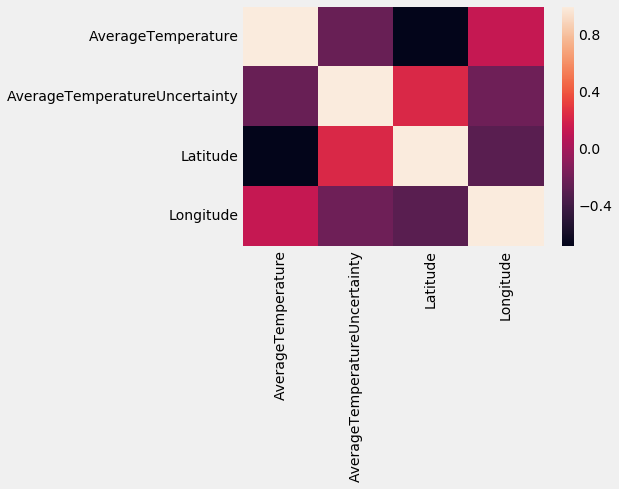

In [129]:
sns.heatmap(climate.corr())

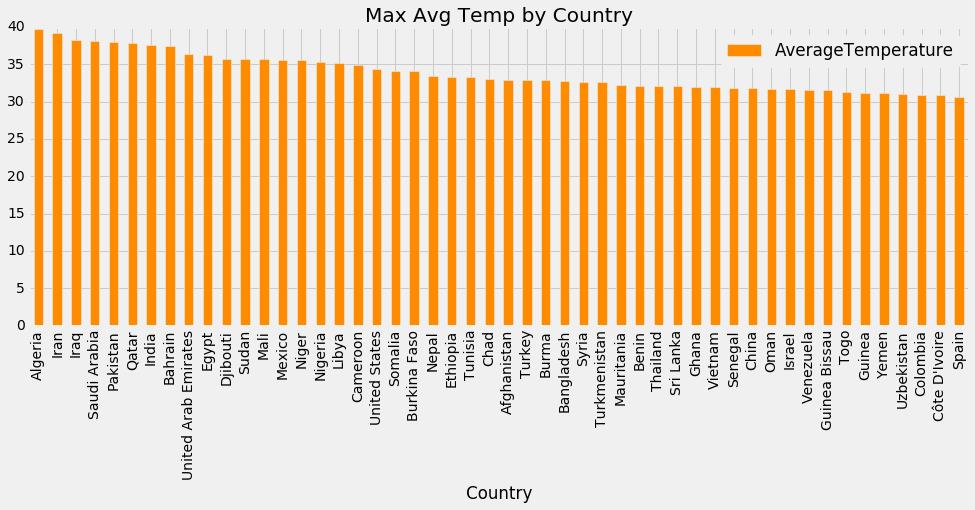

In [132]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate.groupby('Country')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by Country')

In [138]:
# Convert the dt column to datetime and extract the year
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

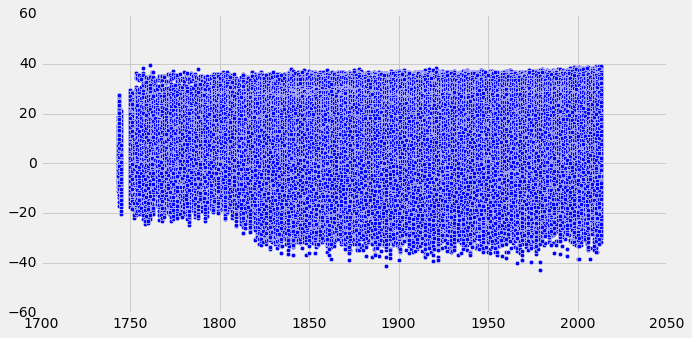

In [157]:
x = climate['year']
y = climate['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

In [162]:
# subset the data to just the US
climate_sub_us = climate.loc[climate['Country'] == 'United States']

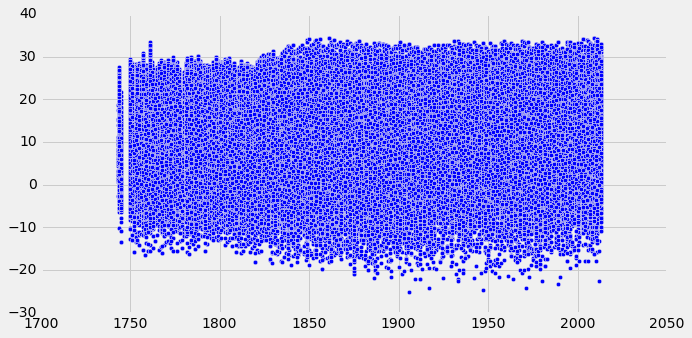

In [164]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

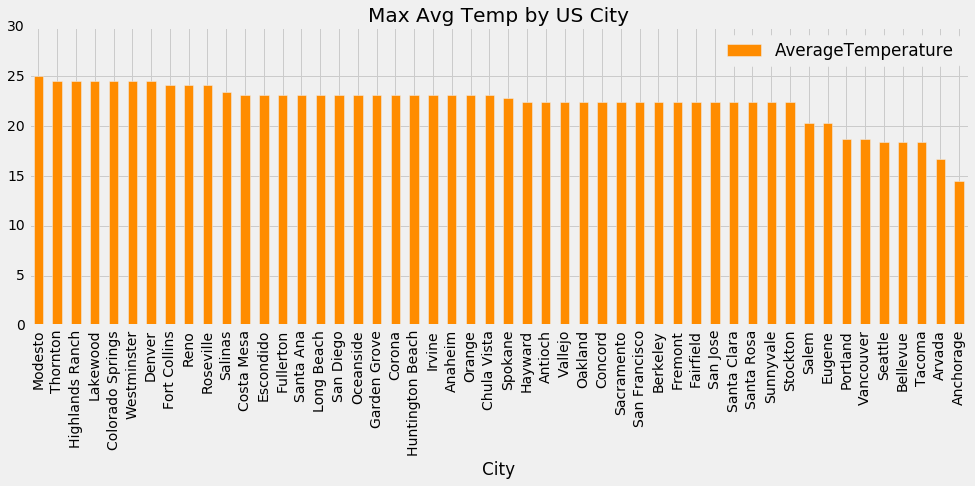

In [167]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate_sub_us.groupby('City')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by US City')